# Image Classification by MLP - Fashion MNIST

In this exercise, we will try to use a neural network on a simple classification task: classifying images of clothes into 10 classes.

We will first download the data:

In [28]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts

#TODO: load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#TODO: Resample the dataset if needed
#X_train = ...
#y_train = ...
#X_test = ...
#y_test = ...

X_train.shape
X_test.shape

(10000, 28, 28)

This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

Now begin by exploring the data. Try to display some images with the associated label.

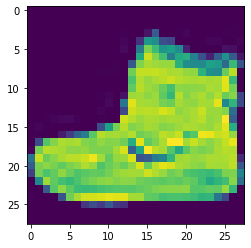

In [29]:
# TODO: Explore the data, display some input images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#np.random.seed(0)
idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[0])
plt.show()

# besides NN SVMs or kNN could be used

**Before going further**: what methods could you use to perform such a classification task?

---

The first method you will try is using neural networks. First step is the data preparation: data rescaling, label preparation.

Hint: you can use the Keras function `to_categorical`

In [36]:
# TODO: Make the data preparation
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train,num_classes = 10)
y_test_cat = to_categorical(y_test,num_classes = 10)


X_train_norm = X_train/255
X_test_norm = X_test/255
#print(X_test_norm.shape)
# TODO: reshape the image data (2D array) into input 1D array for a neural network
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0],784)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0],784)
#print(X_test_norm.shape)

Next step: model building with Keras. Build your neural network architecture. At first, I would recommend a light architecture: no more than 2 hidden layers, with about 10 units per layer. Put that model into a function, so that you can reuse it later.

In [43]:
# TODO: Build your model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def my_model(input_dim):
    # Create the Sequential object
    model = Sequential()

    # Add 2 dense layers with 10 neurons each using sigmoid or relu activation
    model.add(tf.keras.layers.Dense(15, input_dim=input_dim, activation='relu'))
    model.add(tf.keras.layers.Dense(15, activation='relu'))
    model.add(tf.keras.layers.Dense(15, activation='relu'))
    
    # Add the output layer with one unit: the predicted result
    model.add(Dense(10, activation='softmax'))
    
    return model

Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [44]:
import os

#https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
# os.environ['KMP_DUPLICATE_LIB_OK']='True' 

# TODO: Compile and fit your model
model = my_model(784)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_norm, y_train_cat, epochs=150, batch_size=256)

Epoch 1/150
235/235 [==============================] - 0s 904us/step - loss: 1.0160 - accuracy: 0.6431
Epoch 2/150
235/235 [==============================] - 0s 913us/step - loss: 0.5476 - accuracy: 0.8099
Epoch 3/150
235/235 [==============================] - 0s 895us/step - loss: 0.4832 - accuracy: 0.8331
Epoch 4/150
235/235 [==============================] - 0s 907us/step - loss: 0.4480 - accuracy: 0.8452
Epoch 5/150
235/235 [==============================] - 0s 895us/step - loss: 0.4285 - accuracy: 0.8491
Epoch 6/150
235/235 [==============================] - 0s 913us/step - loss: 0.4179 - accuracy: 0.8520
Epoch 7/150
235/235 [==============================] - 0s 904us/step - loss: 0.4055 - accuracy: 0.8577
Epoch 8/150
235/235 [==============================] - 0s 917us/step - loss: 0.3978 - accuracy: 0.8598
Epoch 9/150
235/235 [==============================] - 0s 912us/step - loss: 0.3913 - accuracy: 0.8621
Epoch 10/150
235/235 [==============================] - 0s 900us/step - l

235/235 [==============================] - 0s 904us/step - loss: 0.2809 - accuracy: 0.8983
Epoch 80/150
235/235 [==============================] - 0s 919us/step - loss: 0.2791 - accuracy: 0.8979
Epoch 81/150
235/235 [==============================] - 0s 932us/step - loss: 0.2795 - accuracy: 0.8975
Epoch 82/150
235/235 [==============================] - 0s 925us/step - loss: 0.2801 - accuracy: 0.8971
Epoch 83/150
235/235 [==============================] - 0s 916us/step - loss: 0.2782 - accuracy: 0.8989
Epoch 84/150
235/235 [==============================] - 0s 916us/step - loss: 0.2778 - accuracy: 0.8994
Epoch 85/150
235/235 [==============================] - 0s 925us/step - loss: 0.2769 - accuracy: 0.8998
Epoch 86/150
235/235 [==============================] - 0s 916us/step - loss: 0.2754 - accuracy: 0.8993
Epoch 87/150
235/235 [==============================] - 0s 909us/step - loss: 0.2767 - accuracy: 0.8995
Epoch 88/150
235/235 [==============================] - 0s 908us/step - loss:

Once your model has been trained, compute the accuracy (and other metrics if you want) on the train and test dataset.

Be careful, Keras returns softmax output (so an array of 10 values between 0 and 1, for which the sum is equal to 1). To compute correctly the accuracy, you have to convert that array into a categorical array with zeros and a 1.

In [45]:
# TODO: Compute the accuracy of your model
print('accuracy on train with NN:', model.evaluate(X_train_norm, y_train_cat, verbose=0)[1])
print('accuracy on test with NN:', model.evaluate(X_test_norm, y_test_cat, verbose=0)[1])

# increased epochs to 150 and batch size to 256
# also added extra layer and changed layer size from 10 to 15

# original result was:
# accuracy on train with NN: 0.8917333483695984
# accuracy on test with NN: 0.8561999797821045


accuracy on train with NN: 0.9069833159446716
accuracy on test with NN: 0.8551999926567078


What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? The activation functions?

You should try!

---

In order to compare your results with more traditional machine learning methods, you will do this work with another method: a PCA followed by a classification model (of your choice). Of course, you can perform hyperparameter optimization using a gridsearch on that model!

Fit your model and display the performances.

In [39]:
# TODO: Redo the classification with PCA and classification model
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

In [41]:
# TODO: use any classifier you want
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_pca, y_train)

print('score with RF on train', rf.score(X_train_pca, y_train))
print('score with RF on test', rf.score(X_test_pca, y_test))

score with RF on train 1.0
score with RF on test 0.824


Are the performances different? Can you explain why?

If you still have time, you could try to use scikit-learn's `Pipeline` to perform the hyperparameter optimization jointly on the PCA and the classification model. This might improve your performances.